In [1]:
install.packages("cluster.datasets")

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'cluster.datasets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abine\AppData\Local\Temp\Rtmpe2vvhK\downloaded_packages


In [1]:
library(cluster.datasets)
data(all.mammals.milk.1956)
head(all.mammals.milk.1956)

,name,water,protein,fat,lactose,ash
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Horse,90.1,2.6,1.0,6.9,0.35
2,Orangutan,88.5,1.4,3.5,6.0,0.24
3,Monkey,88.4,2.2,2.7,6.4,0.18
4,Donkey,90.3,1.7,1.4,6.2,0.40
5,Hippo,90.4,0.6,4.5,4.4,0.10
6,Camel,87.7,3.5,3.4,4.8,0.71


In [2]:
unique(all.mammals.milk.1956$name)

[1] "Horse"      "Orangutan"  "Monkey"     "Donkey"     "Hippo"     
 [6] "Camel"      "Bison"      "Buffalo"    "Guinea Pig" "Cat"       
[11] "Fox"        "Llama"      "Mule"       "Pig"        "Zebra"     
[16] "Sheep"      "Dog"        "Elephant"   "Rabbit"     "Rat"       
[21] "Deer"       "Reindeer"   "Whale"      "Seal"       "Dolphin"

This dataset conatains data of the compostion of the milk of mammals

Removing class labels/identifier column from data

In [3]:
set.seed(123)
input=all.mammals.milk.1956[,2:6]

In [4]:
kmeans(input,centers=3,nstart=20)

K-means clustering with 3 clusters of sizes 7, 16, 2

Cluster means:
     water   protein      fat  lactose      ash
1 69.47143  9.514286 16.28571 2.928571 1.311429
2 86.06250  4.275000  4.17500 5.118750 0.635625
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 3 3

Within cluster sum of squares by cluster:
[1] 300.1562 377.2215  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Here the accuraccy is 89.9%

K-means clustering with 3 clusters of sizes 7, 16, 2

In [5]:
wsplot=function(data,nc=15,seed=123){
    wss=(nrow(data)-1)*sum(apply(data,2,var))
    for(i in 2:nc){
        set.seed(seed)
        wss[i]=sum(kmeans(data,centers=i)$withinss)
    }
    plot(1:nc,wss,type="b",xlab="Number of groups",
        ylab="Sum of squares within a group")
}

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

The elbow method uses WCSS to find the optimal k value

Here k= No. of Clusters

plotting the wcss for k from 1 to 20

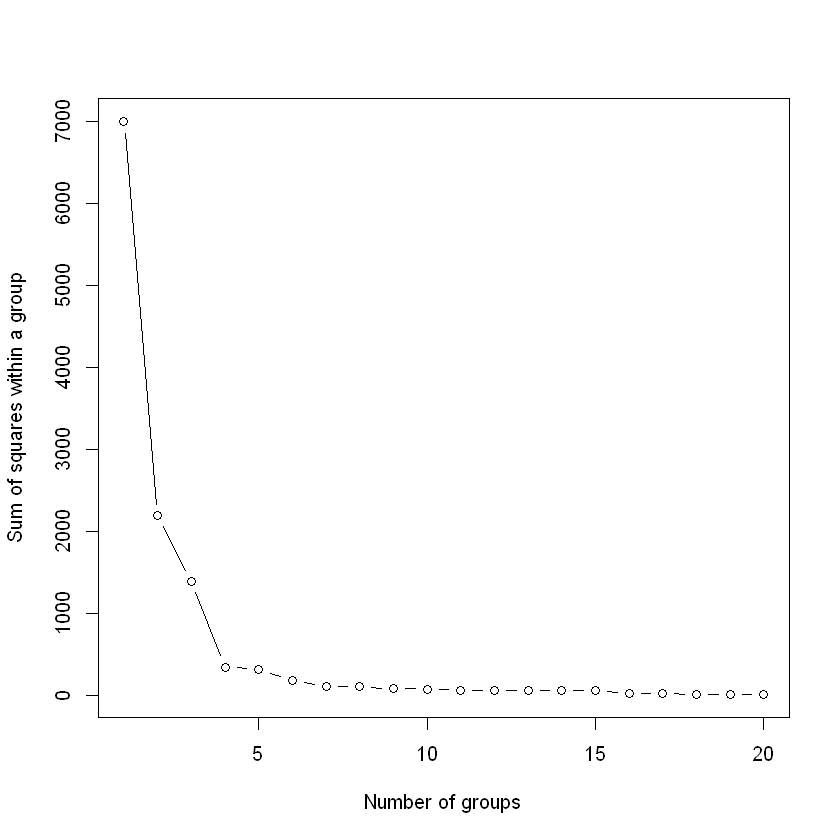

In [6]:
wsplot(input,nc=20)

Here the elbow bend is present at k=4

The k=4 maybe indicating that there are 6 types of mammals

In [7]:
clustering=kmeans(input,centers=4)

In [8]:
clustering

K-means clustering with 4 clusters of sizes 2, 10, 7, 6

Cluster means:
     water   protein      fat  lactose       ash
1 45.65000 10.150000 38.45000 0.450000 0.6900000
2 88.50000  2.570000  2.80000 5.680000 0.4850000
3 81.18571  7.428571  6.90000 4.014286 0.9314286
4 68.33333  9.550000 17.41667 2.916667 1.3300000

Clustering vector:
 [1] 2 2 2 2 2 2 2 3 3 3 3 2 2 3 2 3 3 4 4 4 4 4 4 1 1

Within cluster sum of squares by cluster:
[1]  27.19120  59.41225  63.53491 191.96100
 (between_SS / total_SS =  95.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Here we get a good accuraccy of 95.1%

There are 6 clusters of sizes 2, 10, 7, 6

In [11]:
install.packages("cluster")
install.packages("fpc")

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'cluster' is in use and will not be installed"Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'modeltools', 'DEoptimR', 'mclust', 'flexmix', 'prabclus', 'diptest', 'robustbase', 'kernlab'



package 'modeltools' successfully unpacked and MD5 sums checked
package 'DEoptimR' successfully unpacked and MD5 sums checked
package 'mclust' successfully unpacked and MD5 sums checked
package 'flexmix' successfully unpacked and MD5 sums checked
package 'prabclus' successfully unpacked and MD5 sums checked
package 'diptest' successfully unpacked and MD5 sums checked
package 'robustbase' successfully unpacked and MD5 sums checked
package 'kernlab' successfully unpacked and MD5 sums checked
package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abine\AppData\Local\Temp\RtmpENzxJj\downloaded_packages


In [12]:
library(cluster)
library(fpc)

Warning message:
"package 'fpc' was built under R version 3.6.3"

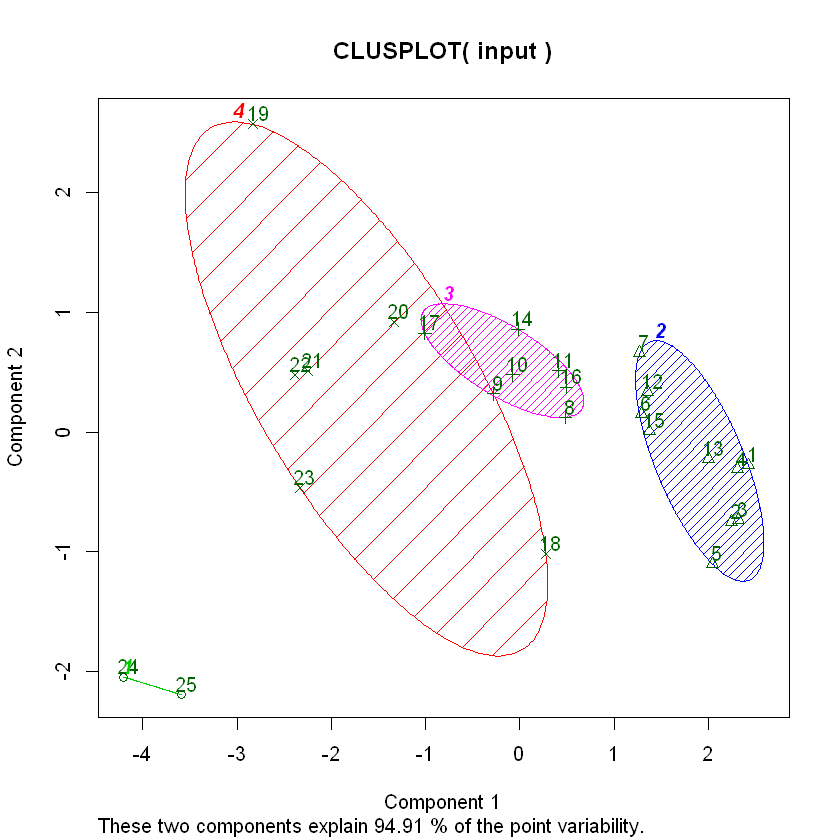

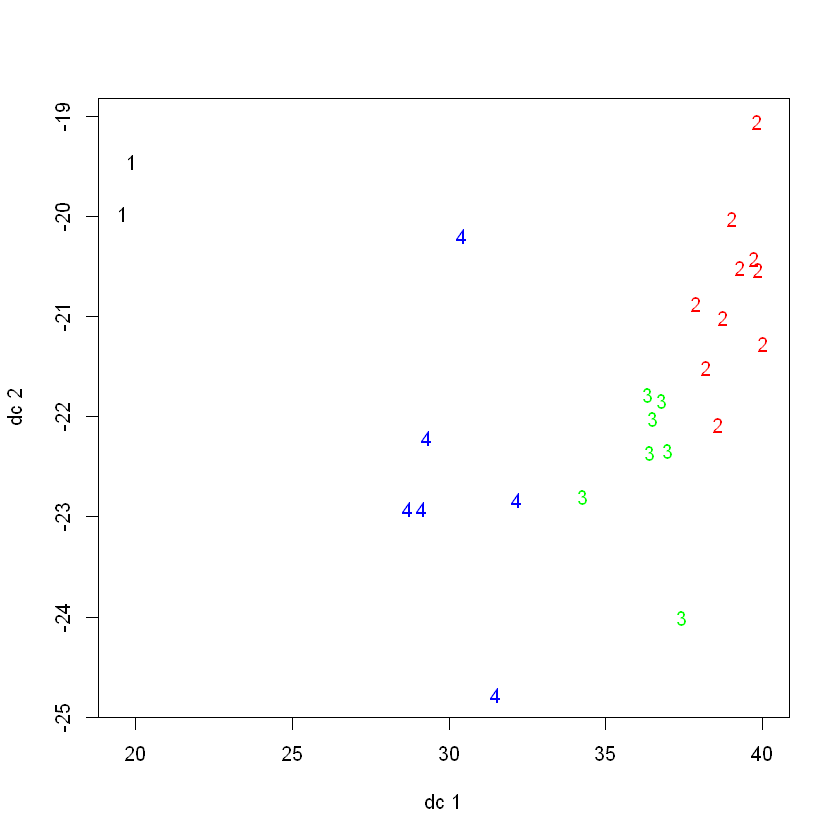

In [13]:
clusplot(input,clustering$cluster,color=TRUE,shade=TRUE,labels=2,lines=0)
plotcluster(input,clustering$cluster)